In [3]:
import numpy as np
import pandas as pd
import rdkit.Chem as ch
import rdkit.Chem as Chem
from rdkit.Chem import Descriptors
import numpy as np
import sys
import rdkit.Chem.Crippen as Crippen
import rdkit.Chem.rdMolDescriptors as MolDescriptors
from rdkit.Chem import Descriptors

In [5]:
sys.path.insert(0,'./Modules/')
from build_encoding import read_decodings, decode
decodings = read_decodings()
input = np.load('./History/in-0.npy')
output = np.load('./History/in-0.npy')

In [6]:
decode(input,decodings)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [26]:
df = pd.read_excel('./Generated molecules/AKT_trial.xlsx')

In [27]:
df.head()

,Initial,Modified
0,NC(=O)C1Cc2ccccc2N1C(=O)Cc1nc(N2CCOCC2)cc(=O)[...,CCC(=O)NC1CCc2cc(C(=O)NCc3ccc(C4CCOCC4)[nH]3)...
1,O=C(Cc1cc(=O)[nH]c(N2CCOCC2)n1)N1CCc2c(OC(F)F)...,CCN(C)[C@H](C)c1nc(CC(=O)c2c3CCNc3cc(C(F)F)c2...
2,O=C(Nc1ccc(F)cc1)C(F)(F)c1nc(N2CCOCC2)cc(=O)[n...,O=C(Nc1c(F)c2c(COCC2)s1)C(F)(F)c1ccc(C2CCOCC2...
3,CC(=O)Nc1cc(Nc2cnn3c(C#N)cc(NC4COC4)nc23)ccc1C...,CC(=O)NC1(Nc2cc(Nc3c4ccccn4nc3C#N)cc(C(C)C)c2...
4,CCC(=O)N1CC[C@@H](Oc2ncnc3ccc(-c4cnc(OC)c(C#N)...,CCC(=O)N1CC[C@H](OCc2ccc3[nH]ccc3c2-c2cnc(OC)...


In [20]:
img = (ch.MolFromSmiles(df.iloc[1,0]))
mol2 = ch.MolFromSmiles(df.iloc[1,1])

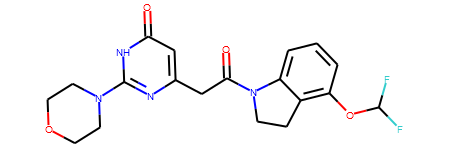

In [21]:
img

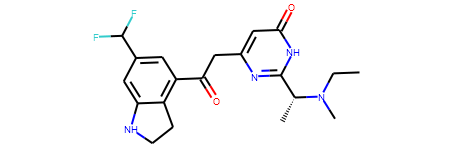

In [22]:
mol2

In [31]:
mol = []
for smile in df['Initial']:
    mol.append(ch.MolFromSmiles(smile))

In [32]:
logP = []
mw = []
tpsa = []
ss = []
for molecule in mol:
    logP.append(Crippen.MolLogP(molecule))
    mw.append(MolDescriptors.CalcExactMolWt(molecule))
    tpsa.append(Descriptors.TPSA(molecule))
df['logP'] = np.asarray(logP)
df['MW'] = np.asarray(mw)
df['tPSA'] = np.asarray(tpsa)
df['SweetSpot'] = ((3<df['logP']) & (df['logP']<5)& (320<df['MW']) & (df['MW']<420) & (80<df['tPSA']) & (df['tPSA']<110))
df['SweetSpot'].describe()

count       316
unique        1
top       False
freq        316
Name: SweetSpot, dtype: object

In [37]:
mol = []
for smile in df[' Modified']:
    mol.append(ch.MolFromSmiles(smile))
logP = []
mw = []
tpsa = []
ss = []
for molecule in mol:
    logP.append(Crippen.MolLogP(molecule))
    mw.append(MolDescriptors.CalcExactMolWt(molecule))
    tpsa.append(Descriptors.TPSA(molecule))
df['logP'] = np.asarray(logP)
df['MW'] = np.asarray(mw)
df['tPSA'] = np.asarray(tpsa)
df['SweetSpot'] = ((3<df['logP']) & (df['logP']<5)& (320<df['MW']) & (df['MW']<420) & (80<df['tPSA']) & (df['tPSA']<110))
df['SweetSpot'].describe()

count       316
unique        2
top       False
freq        302
Name: SweetSpot, dtype: object

In [41]:
df.loc[df.SweetSpot==True]

,Initial,Modified,logP,MW,tPSA,SweetSpot
0,NC(=O)C1Cc2ccccc2N1C(=O)Cc1nc(N2CCOCC2)cc(=O)[...,CCC(=O)NC1CCc2cc(C(=O)NCc3ccc(C4CCOCC4)[nH]3)...,3.35220,395.220892,83.22,True
3,CC(=O)Nc1cc(Nc2cnn3c(C#N)cc(NC4COC4)nc23)ccc1C...,CC(=O)NC1(Nc2cc(Nc3c4ccccn4nc3C#N)cc(C(C)C)c2...,3.34748,404.196074,103.48,True
4,CCC(=O)N1CC[C@@H](Oc2ncnc3ccc(-c4cnc(OC)c(C#N)...,CCC(=O)N1CC[C@H](OCc2ccc3[nH]ccc3c2-c2cnc(OC)...,3.63768,403.196274,91.24,True
25,Cc1n[nH]c2cnc(-c3cncc(OC[C@@H](N)Cc4ccc(Br)cc4...,CSc1ccc(CC(Cc2cc(-c3cccc4nccn34)cnc2)C(=O)CN)cn1,3.44240,417.162331,86.17,True
27,CC(=O)Nc1cc(Nc2cnn3c(C#N)cc(NC4COC4)nc23)ccc1C...,CC(=O)NC1(CNc2cc(Nc3c4ccccn4nc3C#N)cc(C(C)C)c...,3.38998,418.211724,103.48,True
48,O=S(=O)(Cc1nc(-c2ccccn2)cc(N2CCOCC2)n1)c1ccc(F...,O=S(=O)(Cc1nc(C2CCOCC2)cc(-c2ccccn2)n1)c1ccc(...,3.54560,412.123476,82.04,True
61,CC(=O)Nc1cc(Nc2cnn3c(C#N)cc(NC4COC4)nc23)ccc1C...,CC(=O)NC1(CNc2cc(Nc3c4ccccn4nc3C#N)ccc2C(C)C)...,3.38998,418.211724,103.48,True
62,CCc1cc(-c2cnc3[nH]cc(-c4cn[nH]c4)c3c2)nc(N)n1,CCc1cc(-c2c[nH]c3c2ccnc3-c2c[nH]nc2)nc(I)n1,3.57700,416.024642,83.14,True
78,Cc1nc(C(=O)NN2CCCC2)sc1-c1ccnc(C(C)(C)C)c1,CC(C)(C)Oc1cc(-c2c(CN)nc([C@H](O)CCN3CCCC3)s2...,3.36040,390.208947,84.50,True
87,CCc1cc(-c2cnc3[nH]cc(-c4cn[nH]c4)c3c2)nc(N)n1,CCc1cc(-c2cnc3[nH]cc(-c4c[nH]nc4)c3c2)nc(I)n1,3.57700,416.024642,83.14,True
